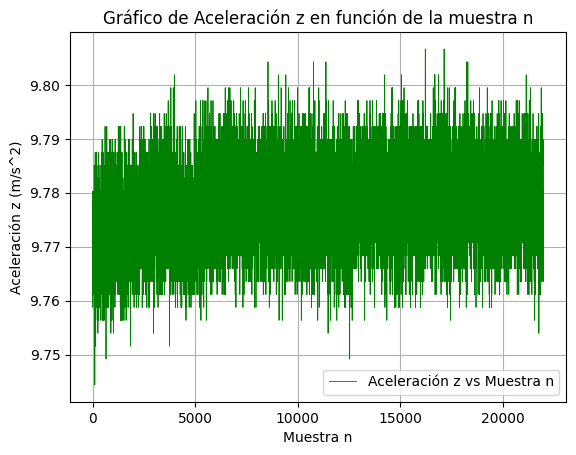

Valor medio de z: 9.7777 m
Desviación estándar de z: 0.0072 m


In [16]:
import numpy as np
import matplotlib.pyplot as plt

datos = np.genfromtxt('datos/datos.csv', skip_header=1)

z = datos[:22000, 3]
n = np.arange(1, len(z)+1)

plt.figure(dpi=100)
plt.plot(n, z, label='Aceleración z vs Muestra n', color='green', lw=0.6)
plt.title('Gráfico de Aceleración z en función de la muestra n')
plt.xlabel('Muestra n')
plt.ylabel('Aceleración z (m/s^2)')
plt.legend()
plt.grid()
plt.show()

mz = np.mean(z)
desv_z = np.std(z)

print(f'Valor medio de z: {mz:.4f} m')
print(f'Desviación estándar de z: {desv_z:.4f} m')



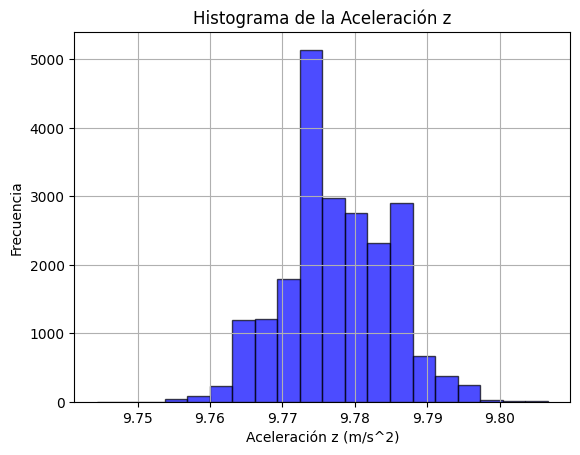

In [17]:
import numpy as np
import matplotlib.pyplot as plt

datos = np.genfromtxt('datos/datos.csv', skip_header=1)

z = datos[:22000, 3]
n = np.arange(1, len(z)+1)

plt.hist(z, bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histograma de la Aceleración z')
plt.xlabel('Aceleración z (m/s^2)')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

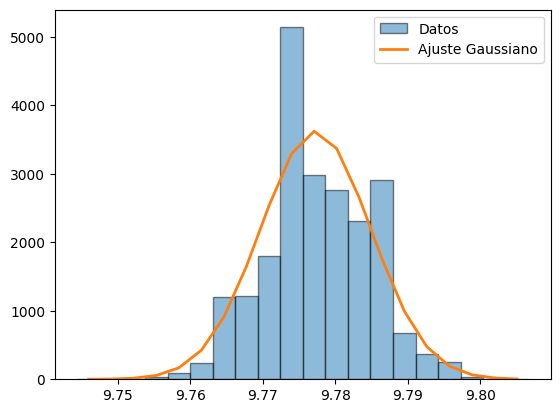

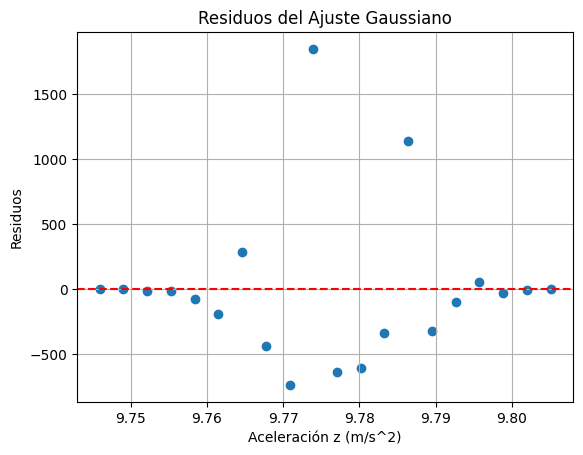

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

datos = np.genfromtxt('datos/datos.csv', skip_header=1)

z = datos[:22000, 3]

counts, bin_edges = np.histogram(z, bins=20)
centers = (bin_edges[:-1] + bin_edges[1:]) / 2  #centros de bins

#funcion a ajustar
def gauss(z, A, mu, sigma):
    return A * np.exp(-(z - mu)**2 / (2 * sigma**2))

#Ajuste
p0 = [max(counts), centers[np.argmax(counts)], np.std(z)]  # Parámetros iniciales

params, cov = curve_fit(gauss, centers, counts, p0=p0)

A, mu, sigma = params

ajuste = gauss(centers, A, mu, sigma)
residuos = counts - ajuste

#Graficar histograma y ajuste

plt.figure()
plt.hist(z, bins=20, alpha=0.5, label="Datos", edgecolor="black")
plt.plot(centers, gauss(centers, *params), label="Ajuste Gaussiano", linewidth=2)
plt.legend()
plt.show()

#Graficar residuos
plt.figure()
plt.scatter(centers, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos del Ajuste Gaussiano')
plt.xlabel('Aceleración z (m/s^2)')
plt.ylabel('Residuos')
plt.grid()
plt.show()

## Analizando el grafico del histograma y el ajuste gaussiano

Podemos notar que el histograma de los datos originales tiene una forma aproximadamente gaussiana, pero con algunas desviaciones notables. Al ajustar una función gaussiana a los datos, podemos observar que la curva ajustada no captura completamente todas las características del histograma, especialmente en las zonas mas centradas. Esto sugiere que, aunque la distribución de los datos se asemeja a una distribución normal, existen factores adicionales que afectan la distribución de las aceleraciones medidas.

## Analizando el grafico de residuos del ajuste gaussiano
Podemos notar que en el centro de los datos los residuos son mayores, lo que indica que el ajuste gaussiano no captura completamente la variabilidad de los datos en esa región. Esto sugiere que la distribución de las aceleraciones tiene características adicionales que no son bien representadas por una simple distribución gaussiana, especialmente en el centro de la distribución, o bien los bins necesitan cambiarse para mejorar el ajuste.

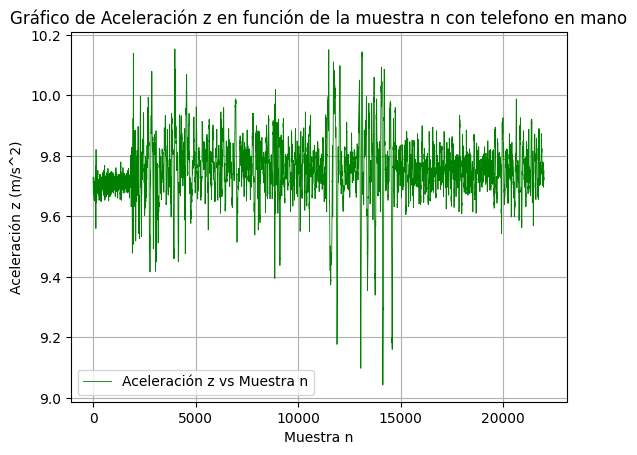

Valor medio de z: 9.7540 m
Desviación estándar de z: 0.1020 m


In [21]:
import numpy as np
import matplotlib.pyplot as plt

datos2 = np.genfromtxt('datos2/datos2.csv', skip_header=1)

z0 = datos2[:22000, 3]
n0 = np.arange(1, len(z0)+1)

plt.figure(dpi=100)
plt.plot(n0, z0, label='Aceleración z vs Muestra n', color='green', lw=0.6)
plt.title('Gráfico de Aceleración z en función de la muestra n con telefono en mano')
plt.xlabel('Muestra n')
plt.ylabel('Aceleración z (m/s^2)')
plt.legend()
plt.grid()
plt.show()

mz = np.mean(z0)
desv_z = np.std(z0)

print(f'Valor medio de z: {mz:.4f} m')
print(f'Desviación estándar de z: {desv_z:.4f} m')



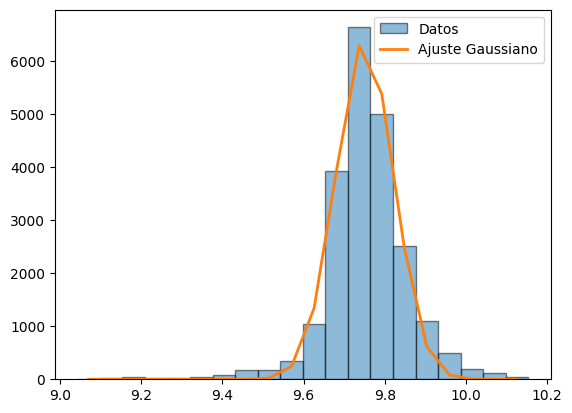

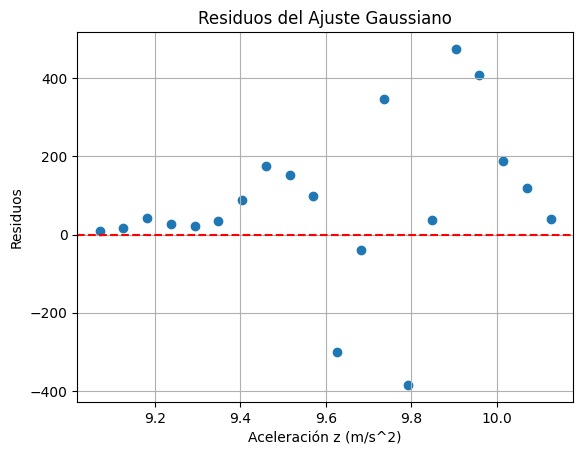

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

datos2 = np.genfromtxt('datos2/datos2.csv', skip_header=1)

z0 = datos2[:22000, 3]

counts, bin_edges = np.histogram(z0, bins=20)
centers = (bin_edges[:-1] + bin_edges[1:]) / 2  #centros de bins

#funcion a ajustar
def gauss(z0, A, mu, sigma):
    return A * np.exp(-(z0 - mu)**2 / (2 * sigma**2))

#Ajuste
p0 = [max(counts), centers[np.argmax(counts)], np.std(z0)]  # Parámetros iniciales

params, cov = curve_fit(gauss, centers, counts, p0=p0)

A, mu, sigma = params

ajuste = gauss(centers, A, mu, sigma)
residuos = counts - ajuste

#Graficar histograma y ajuste

plt.figure()
plt.hist(z0, bins=20, alpha=0.5, label="Datos", edgecolor="black")
plt.plot(centers, gauss(centers, *params), label="Ajuste Gaussiano", linewidth=2)
plt.legend()
plt.show()

#Graficar residuos
plt.figure()
plt.scatter(centers, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos del Ajuste Gaussiano')
plt.xlabel('Aceleración z (m/s^2)')
plt.ylabel('Residuos')
plt.grid()
plt.show()

## Analizando el grafico del histograma y el ajuste gaussiano 2

Podemos notar que existe una distribución gaussiana centrada en 9.81 m/s², que corresponde a la aceleración debida a la gravedad. Esto indica que una parte significativa de las mediciones de aceleración z está influenciada por la gravedad, lo cual es esperado en un entorno donde el sensor está sujeto a la fuerza gravitacional. El ajuste gaussiano captura bien esta característica, mostrando un pico claro en torno a este valor. Realizando el ajuste gaussiano podemos notar que es similar a la distribución de los datos, lo que sugiere que la mayoría de las mediciones de aceleración z están centradas alrededor de la aceleración debida a la gravedad, con algunas variaciones debidas a otros factores o ruidos en las mediciones.

## Analizando el grafico de residuos del ajuste gaussiano 2

Podemos notar que los residuos son relativamente pequeños en comparación con la magnitud de los datos originales, lo que indica que el ajuste gaussiano captura bien la mayoría de las características de la distribución de aceleraciones z. Sin embargo, también podemos observar algunas desviaciones en ciertas regiones, lo que sugiere que hay factores adicionales o ruidos en las mediciones que no son completamente capturados por el modelo gaussiano. En general, el ajuste parece ser adecuado para describir la distribución de las aceleraciones z en este conjunto de datos.

# Comparacion de ambos ajustes

Al comparar ambos ajustes gaussianos realizados en los dos conjuntos de datos, podemos observar diferencias significativas en la forma y los parámetros de las distribuciones ajustadas. En el primer ajuste, la distribución gaussiana no captura completamente todas las características del histograma, especialmente en las zonas más centradas, lo que sugiere la presencia de factores adicionales que afectan la distribución de las aceleraciones medidas. En el segundo ajuste, la distribucion gaussiana si captura bien la característica principal del histograma, que es la influencia de la gravedad en las mediciones de aceleración z. Los residuos del primer ajuste muestran desviaciones notables en el centro de la distribución, mientras que los residuos del segundo ajuste son relativamente pequeños, indicando un mejor ajuste a los datos. Pero analizando el valor medio de ambos ajustes, podemos notar que ambos están cercanos a 9.81 m/s², lo que indica que en ambos casos la gravedad es un factor dominante en las mediciones de aceleración z, pero el primer ajuste lo hace de forma más precisa que el segundo $$\mu_1 = 9.777 \, m/s^2 , \quad \mu_2 = 9.754 \, m/s^2.$$ En resumen, el primer ajuste gaussiano proporciona una representación más precisa de la distribución de las aceleraciones medidas en comparación con el segundo ajuste, aunque ambos reconocen la influencia predominante de la gravedad en los datos.